## Pokemon Type Prediction Modeling

In [1]:
#All libraries
library(ggplot2)
library(corrplot)
library(rpart)
library(caret)
library(ggparty)
library(dplyr)
library(randomForest)

corrplot 0.92 loaded

Loading required package: lattice

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [2]:
#Import file from Github
file = "https://raw.githubusercontent.com/ccscaiado/MLRepo/main/Assignment%202%20Datasets/Pokemon/pokemon.csv"
df = read.csv(file,header = TRUE)

In [3]:
head(df)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>
1,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,2,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,3,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,4,60,50,65,fire,,8.5,1,0
5,"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,5,80,65,80,fire,,19.0,1,0
6,"['Blaze', 'Solar Power']",0.25,1,1,2.0,0.5,0.5,0.5,1,1,⋯,88.1,6,159,115,100,fire,flying,90.5,1,0


In [4]:
#Check null values
na_counts <- colSums(is.na(df))
na_counts
for (col in names(na_counts)) {
  cat("Column", col, "has", na_counts[col], "NA values\n")
}

abilities       against_bug      against_dark    against_dragon 
                0                 0                 0                 0 
 against_electric     against_fairy     against_fight      against_fire 
                0                 0                 0                 0 
   against_flying     against_ghost     against_grass    against_ground 
                0                 0                 0                 0 
      against_ice    against_normal    against_poison   against_psychic 
                0                 0                 0                 0 
     against_rock     against_steel     against_water            attack 
                0                 0                 0                 0 
   base_egg_steps    base_happiness        base_total      capture_rate 
                0                 0                 0                 0 
    classfication           defense experience_growth          height_m 
                0                 0                 0                20 
               hp     japanese_name              name   percentage_male 
                0                 0                 0                98 
   pokedex_number         sp_attack        sp_defense             speed 
                0                 0                 0                 0 
            type1             type2         weight_kg        generation 
                0                 0                20                 0 
     is_legendary 
                0

Column abilities has 0 NA values
Column against_bug has 0 NA values
Column against_dark has 0 NA values
Column against_dragon has 0 NA values
Column against_electric has 0 NA values
Column against_fairy has 0 NA values
Column against_fight has 0 NA values
Column against_fire has 0 NA values
Column against_flying has 0 NA values
Column against_ghost has 0 NA values
Column against_grass has 0 NA values
Column against_ground has 0 NA values
Column against_ice has 0 NA values
Column against_normal has 0 NA values
Column against_poison has 0 NA values
Column against_psychic has 0 NA values
Column against_rock has 0 NA values
Column against_steel has 0 NA values
Column against_water has 0 NA values
Column attack has 0 NA values
Column base_egg_steps has 0 NA values
Column base_happiness has 0 NA values
Column base_total has 0 NA values
Column capture_rate has 0 NA values
Column classfication has 0 NA values
Column defense has 0 NA values
Column experience_growth has 0 NA values
Column height

In [5]:
# Check for duplicate rows
duplicate_rows <- df[duplicated(df), ]

# Print duplicate rows
# print(duplicate_rows)

# Count the number of duplicate rows
num_duplicates <- sum(duplicated(df))
num_duplicates

[1] 0

In [6]:
#Check types of variables
# str(df) #comment out to check types

In [7]:
# #Handling NaN Values
df$percentage_male[is.na(df$percentage_male)] <- 0
df$weight_kg[is.na(df$weight_kg)] <- median(df$weight_kg, na.rm = TRUE)
df$height_m[is.na(df$height_m)] <- median(df$height_m, na.rm = TRUE)

In [8]:
# #Check null values after treatment
# na_counts = colSums(is.na(df))
# na_counts
# for (col in names(na_counts)) {
#   cat("Column", col, "has", na_counts[col], "NA values\n")
# }

In [9]:
# Count missing values in each column of the dataset
missing_count <- colSums(is.na(df))

# Print the count of missing values for each column
print(missing_count)


        abilities       against_bug      against_dark    against_dragon 
                0                 0                 0                 0 
 against_electric     against_fairy     against_fight      against_fire 
                0                 0                 0                 0 
   against_flying     against_ghost     against_grass    against_ground 
                0                 0                 0                 0 
      against_ice    against_normal    against_poison   against_psychic 
                0                 0                 0                 0 
     against_rock     against_steel     against_water            attack 
                0                 0                 0                 0 
   base_egg_steps    base_happiness        base_total      capture_rate 
                0                 0                 0                 0 
    classfication           defense experience_growth          height_m 
                0                 0                

In [10]:
# Drop columns from the dataset
sub_df <- df[, !(names(df) %in% c("type2","japanese_name","name","classfication","capture_rate","abilities","pokedex_number"))]
# Print the modified dataframe
head(sub_df)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,⋯,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>
1,1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,⋯,0.7,45,88.1,65,65,45,grass,6.9,1,0
2,1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,⋯,1.0,60,88.1,80,80,60,grass,13.0,1,0
3,1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,⋯,2.0,80,88.1,122,120,80,grass,100.0,1,0
4,0.50,1,1,1.0,0.5,1.0,0.5,1,1,0.50,⋯,0.6,39,88.1,60,50,65,fire,8.5,1,0
5,0.50,1,1,1.0,0.5,1.0,0.5,1,1,0.50,⋯,1.1,58,88.1,80,65,80,fire,19.0,1,0
6,0.25,1,1,2.0,0.5,0.5,0.5,1,1,0.25,⋯,1.7,78,88.1,159,115,100,fire,90.5,1,0


In [11]:
#table(sub_df$type1)

In [12]:
unique_values_type1 <- unique(sub_df$type1)
#Print the unique values
#print(unique_values_type1)
type1 <- factor(sub_df$type1, levels = unique_values_type1, ordered = TRUE)
# Convert to numeric labels (default order)
sub_df$type1 <- as.numeric(type1)

In [13]:
#Correlation matrix
correlation_matrix <- cor(sub_df[sapply(sub_df, is.numeric)])
correlation_matrix

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,⋯,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
against_bug,1.000000000,0.2301070487,0.16542965,-0.246942661,0.239566130,0.1379019023,0.202777642,0.183342834,0.129173907,0.079197263,⋯,-0.060109285,0.034897424,-0.04629090,0.05535222,-0.002341863,-0.0438021385,-0.02644224,-0.03201527,-0.0015491274,0.027864279
against_dark,0.230107049,1.0000000000,0.14082998,-0.015829969,-0.301353597,-0.3579811993,0.010527280,-0.179697268,0.672336889,-0.006532705,⋯,0.017350038,0.010588538,-0.20397652,0.17084925,0.132507293,-0.0003263864,0.17752726,0.03501816,-0.0160133053,0.136314825
against_dragon,0.165429651,0.1408299808,1.00000000,-0.108928072,0.439704790,0.0352374970,-0.261569683,0.064849525,-0.049940795,-0.037135266,⋯,0.164060774,0.089720750,0.08422795,0.03973936,-0.047415629,0.0781231895,0.09706726,0.12514143,-0.0252005335,0.014844026
against_electric,-0.246942661,-0.0158299686,-0.10892807,1.000000000,-0.089864400,-0.1027983977,-0.279029207,-0.111460957,-0.073031399,0.056208803,⋯,0.006093448,-0.035354286,0.06766889,0.02230522,0.019192789,0.1114218281,-0.14504386,-0.09497578,-0.0631800846,-0.023151343
against_fairy,0.239566130,-0.3013535974,0.43970479,-0.089864400,1.000000000,0.1577124269,-0.169488690,0.199862205,-0.120806148,0.052899376,⋯,0.116202403,0.129284472,0.02101563,-0.01029570,0.002754103,0.0654011363,0.35380661,0.10064098,0.1508010712,0.050164648
against_fight,0.137901902,-0.3579811993,0.03523750,-0.102798398,0.157712427,1.0000000000,-0.076479931,-0.318940881,-0.546981607,0.269156819,⋯,0.057385582,0.109425294,0.04562049,-0.11848101,-0.044460021,-0.0504945838,0.15493392,0.15726569,0.0006813198,-0.059131815
against_fire,0.202777642,0.0105272803,-0.26156968,-0.279029207,-0.169488690,-0.0764799306,1.000000000,0.528126863,0.050570318,-0.463634257,⋯,-0.084091108,-0.099241645,-0.10390452,-0.08857783,-0.019519527,-0.0791288822,-0.10613654,-0.04119025,0.0611566676,-0.011073175
against_flying,0.183342834,-0.1796972680,0.06484952,-0.111460957,0.199862205,-0.3189408813,0.528126863,1.000000000,0.013203842,-0.358467165,⋯,-0.070810653,-0.060624087,0.10503714,-0.11124294,-0.079022218,-0.0433809824,-0.37382376,-0.12231405,0.0582038933,-0.062214352
against_ghost,0.129173907,0.6723368894,-0.04994079,-0.073031399,-0.120806148,-0.5469816068,0.050570318,0.013203842,1.000000000,0.029541586,⋯,0.031513361,-0.062052008,-0.09888194,0.23330890,0.195439091,-0.0290066606,0.27893426,0.04623774,0.0380272570,0.170746044
against_grass,0.079197263,-0.0065327053,-0.03713527,0.056208803,0.052899376,0.2691568188,-0.463634257,-0.358467165,0.029541586,1.000000000,⋯,0.026647859,0.056885901,0.07409401,-0.09389936,-0.056426746,-0.1536176535,0.02362787,0.04244544,-0.1079872497,-0.070826415


In [14]:
# Find highly correlated variable pairs
threshold <- 0.7
highly_correlated <- which(abs(correlation_matrix) > threshold & correlation_matrix != 1, arr.ind = TRUE)

# Get the variable names for the highly correlated pairs
correlated_pairs <- data.frame(
  Variable1 = rownames(correlation_matrix)[highly_correlated[, 1]],
  Variable2 = colnames(correlation_matrix)[highly_correlated[, 2]],
  Correlation = correlation_matrix[highly_correlated]
)

# Print the highly correlated pairs
print(correlated_pairs)


       Variable1      Variable2 Correlation
1     base_total         attack   0.7301341
2   is_legendary base_egg_steps   0.8734883
3         attack     base_total   0.7301341
4      sp_attack     base_total   0.7411205
5     sp_defense     base_total   0.7174340
6     base_total      sp_attack   0.7411205
7     base_total     sp_defense   0.7174340
8 base_egg_steps   is_legendary   0.8734883


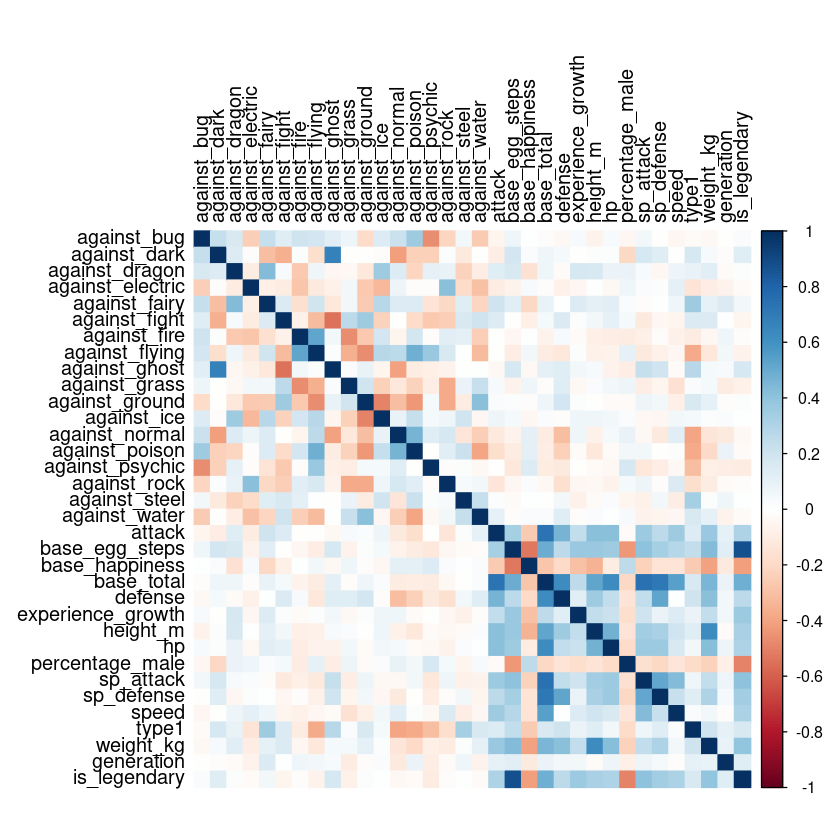

In [15]:
#Plot correlation matrix
library(corrplot)
corrplot(correlation_matrix, method = "color", type = "full", tl.col = "black", tl.srt = 90)

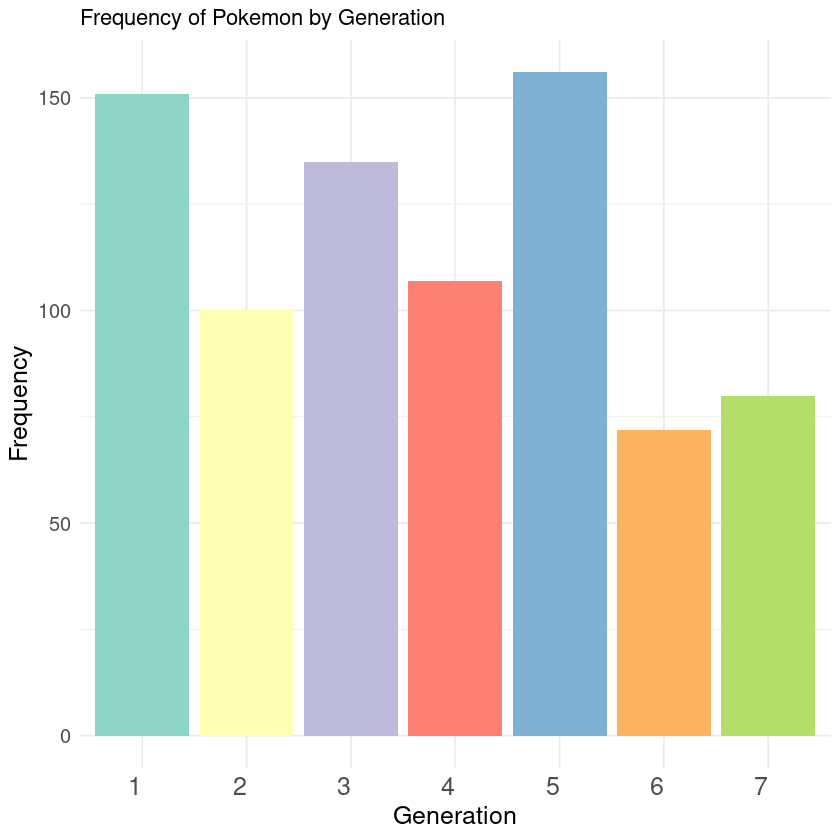

In [16]:
# Plot graph for Pokemon Generation
ggplot(sub_df, aes(x = factor(generation), fill = factor(generation))) +
  geom_bar() +
  ggtitle("Frequency of Pokemon by Generation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 360, hjust = 1, size = 15), 
        axis.text.y = element_text(size = 12), 
        axis.title = element_text(size = 15),
        legend.position="none") + 
  labs(x = "Generation", y = "Frequency") +
  scale_fill_brewer(palette = "Set3") 

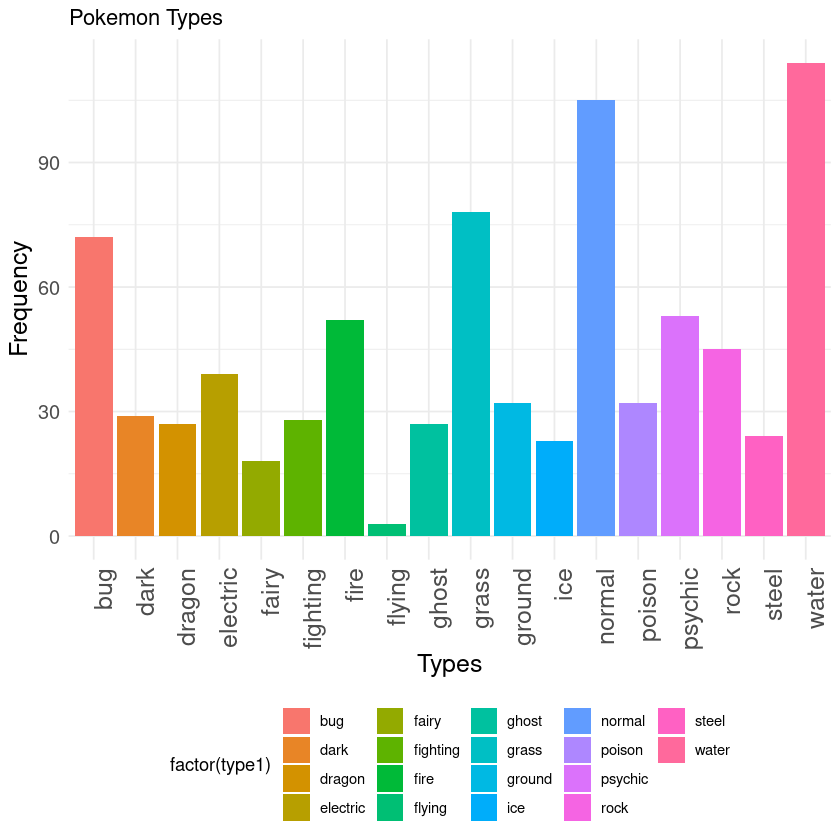

In [17]:
#Plot Pokemon Types
ggplot(df, aes(x = factor(type1), fill = factor(type1))) +
  geom_bar() +
  ggtitle("Pokemon Types") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 15), 
        axis.text.y = element_text(size = 12), 
        axis.title = element_text(size = 15), 
        legend.position="bottom") + 
  labs(x = "Types", y = "Frequency")

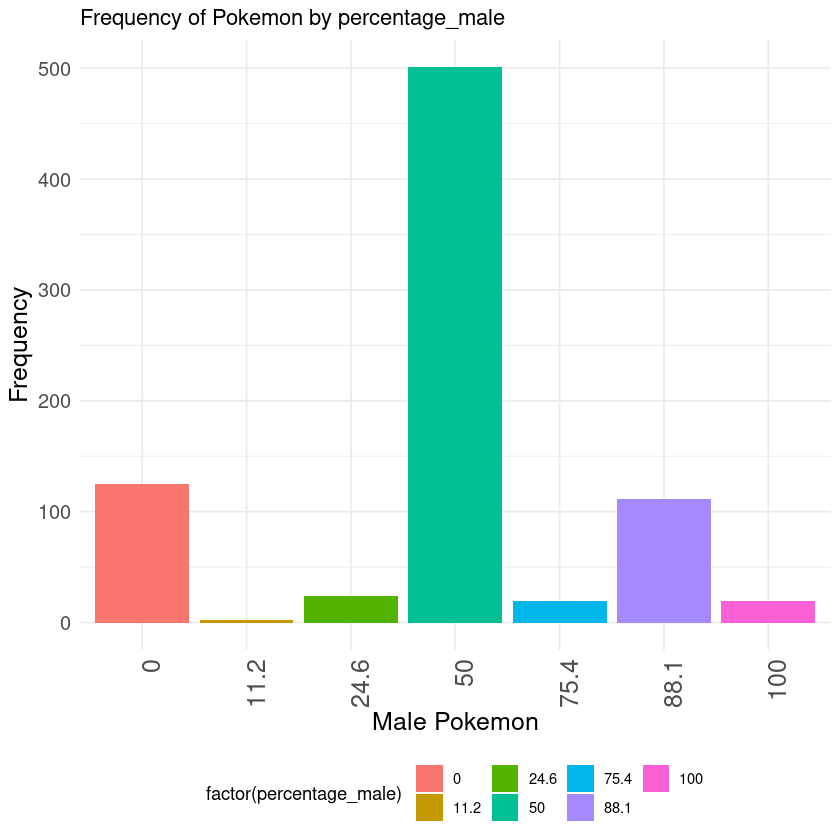

In [18]:
#Plot Pokemon percentage of male

ggplot(sub_df, aes(x = factor(percentage_male), fill = factor(percentage_male))) +
  geom_bar() +
  ggtitle("Frequency of Pokemon by percentage_male") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 15), 
        axis.text.y = element_text(size = 12), 
        axis.title = element_text(size = 15), 
        legend.position = "bottom") + 
  labs(x = "Male Pokemon", y = "Frequency")

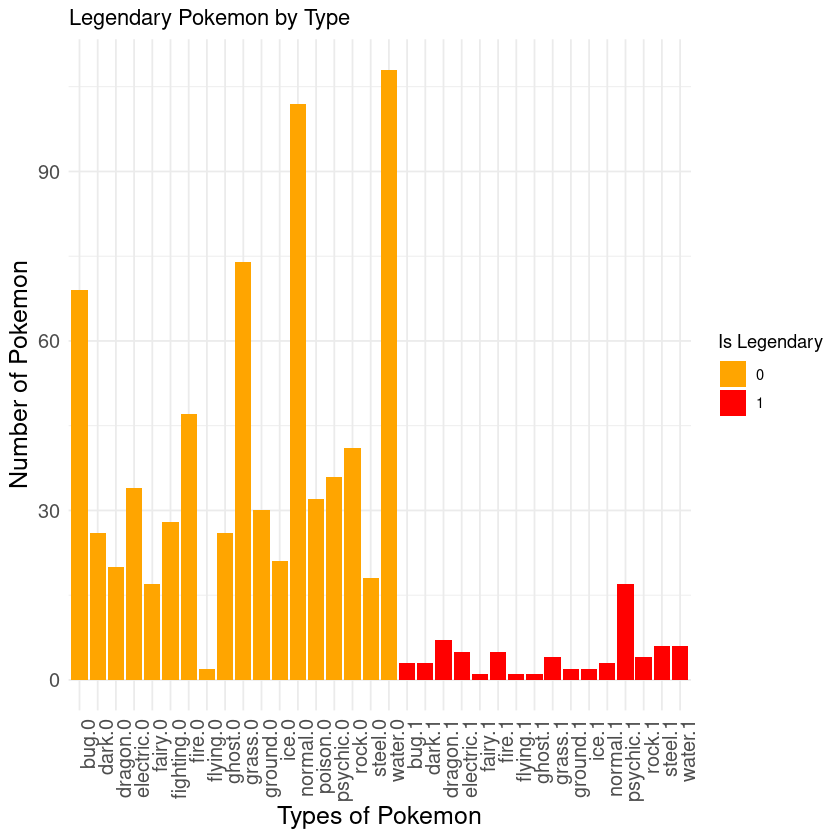

In [19]:
#Plot Pokemon legendary
ggplot(df, aes(x = interaction(type1, is_legendary), fill = factor(is_legendary))) +
  geom_bar(position = "dodge") +
  ggtitle("Legendary Pokemon by Type") +
  labs(x = "Types of Pokemon", y = "Number of Pokemon") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title = element_text(size = 15)) +
  scale_fill_manual(values = c("orange", "red")) +  
  guides(fill = guide_legend(title = "Is Legendary")) 

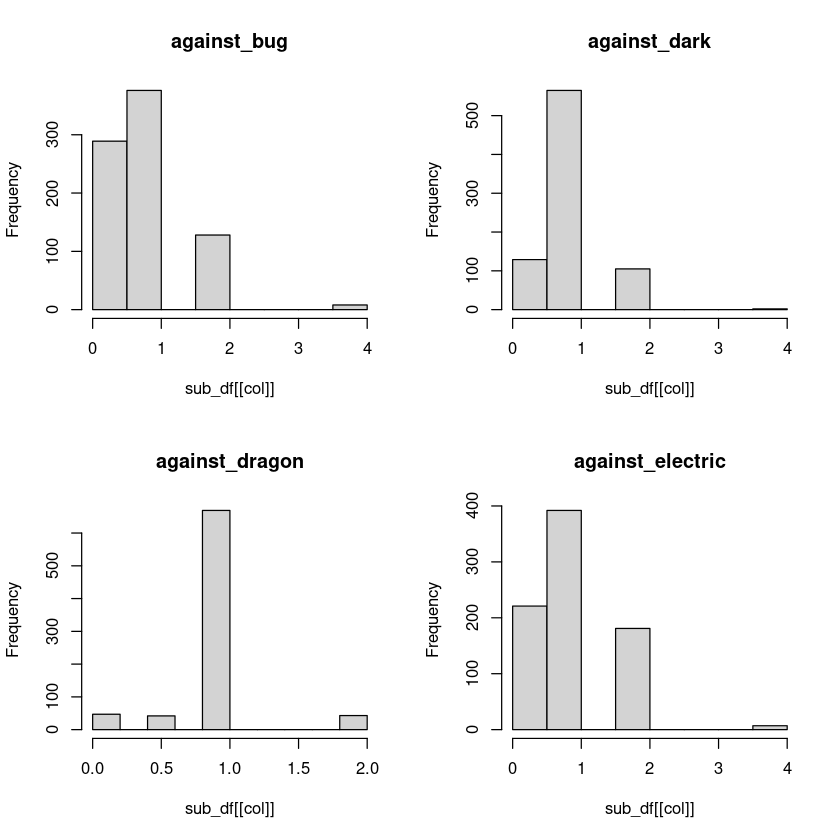

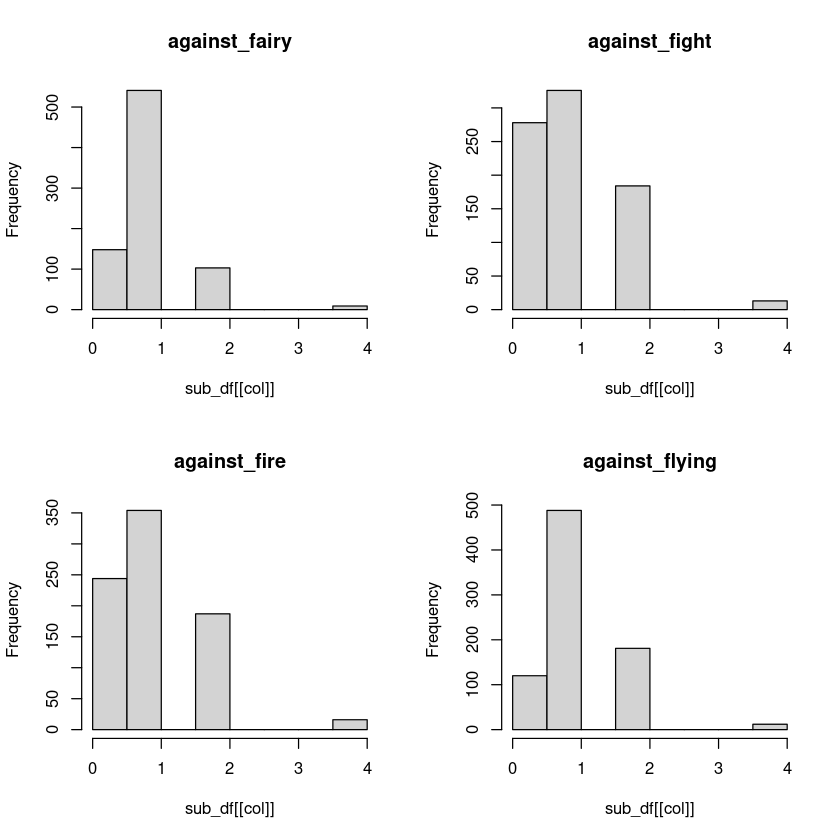

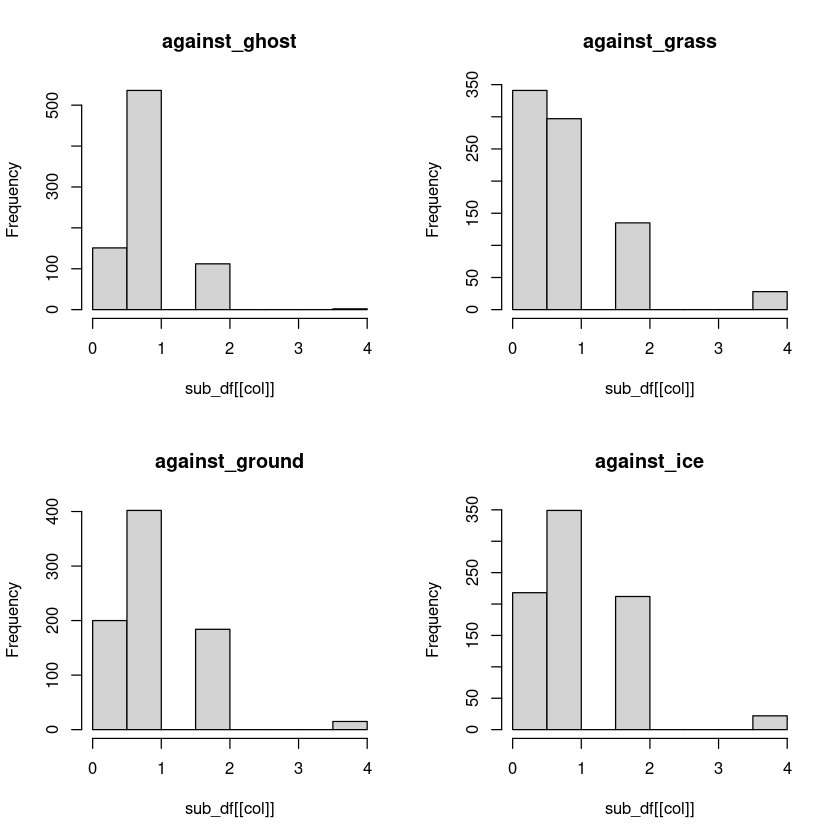

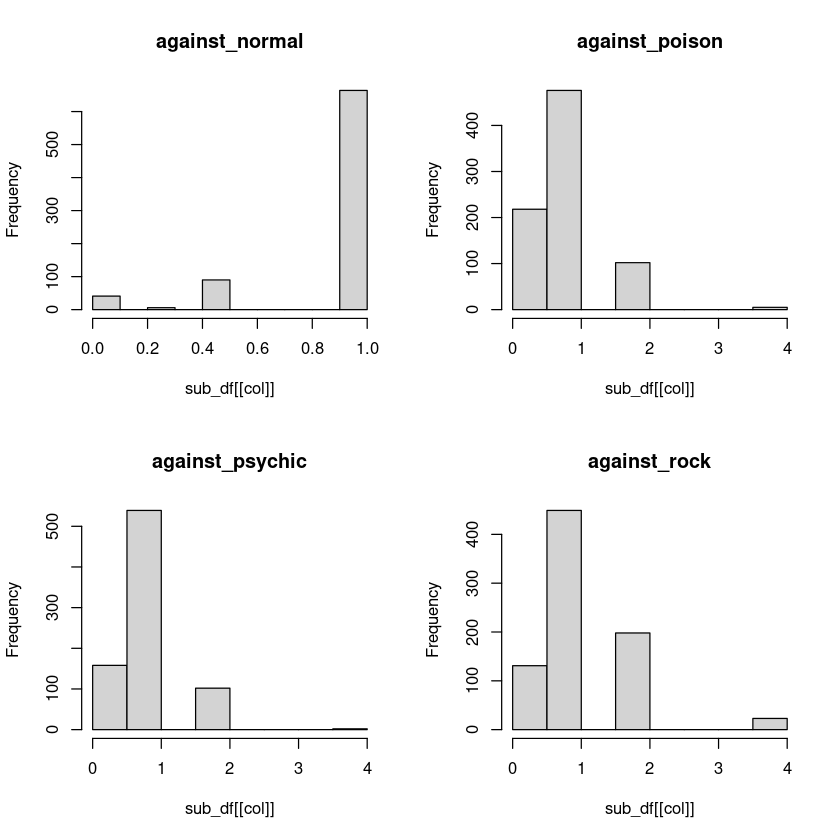

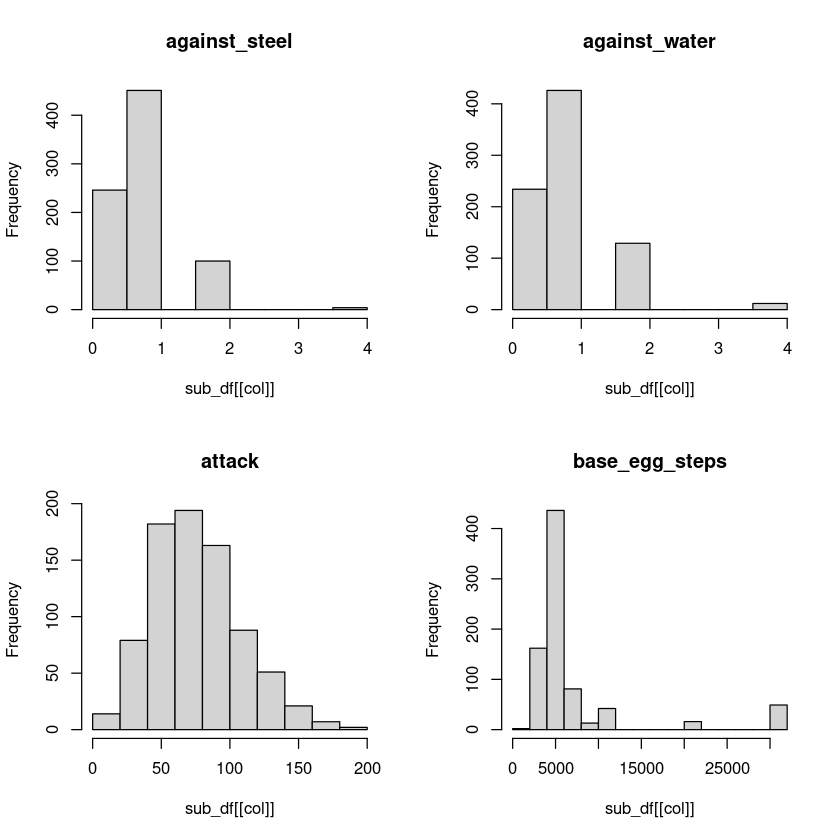

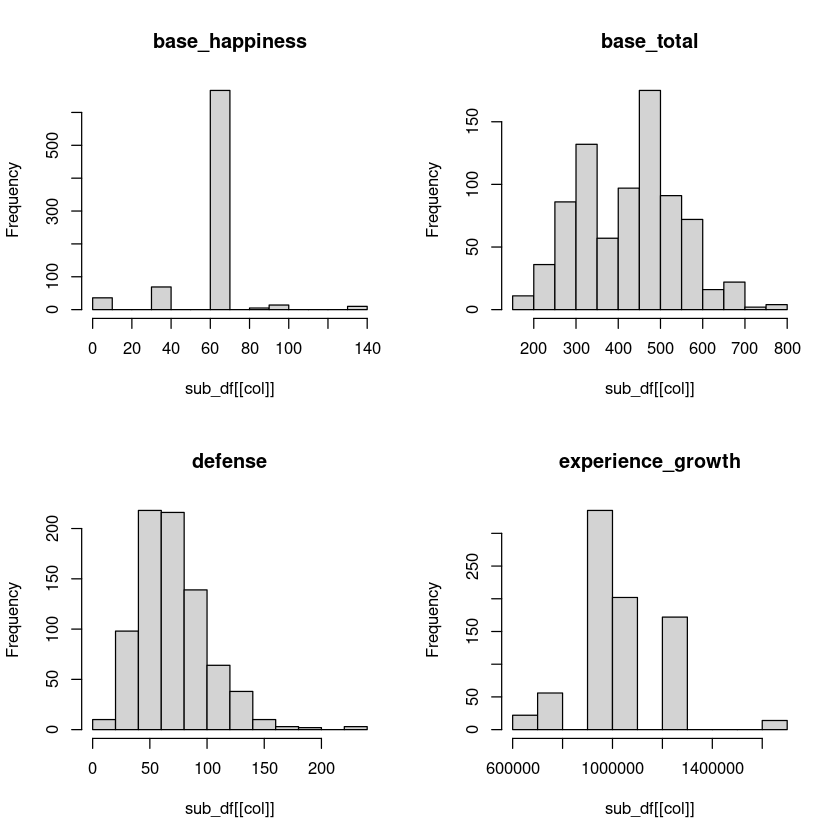

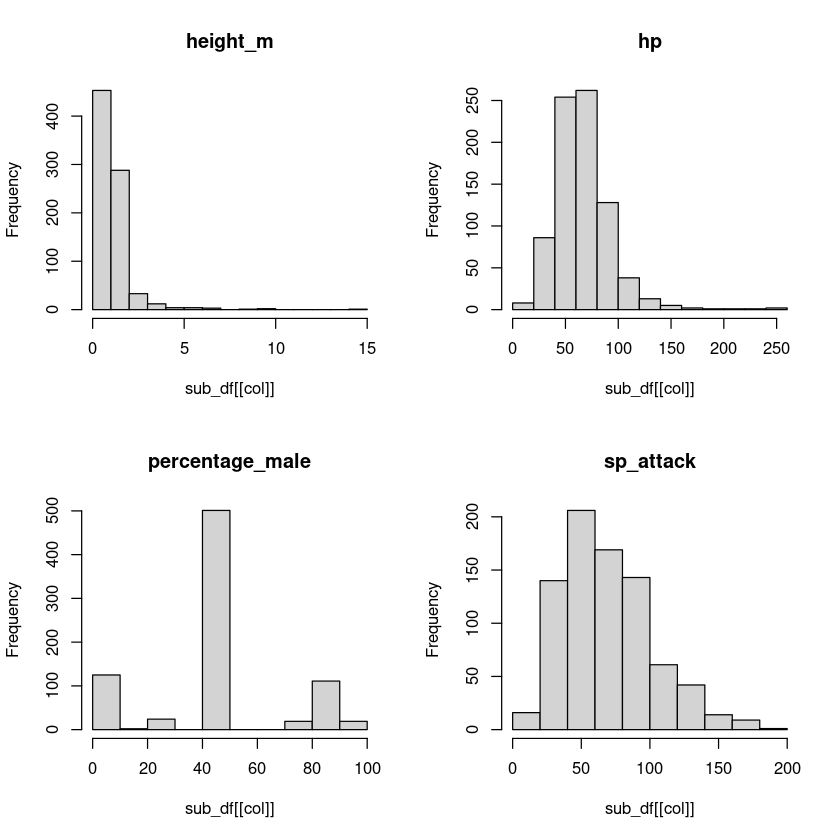

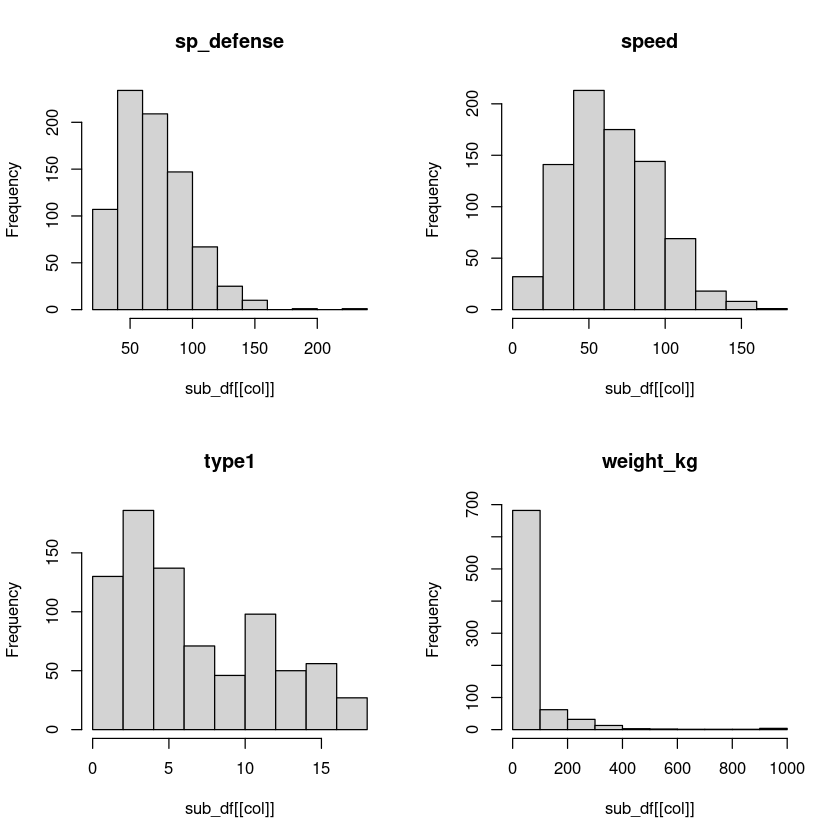

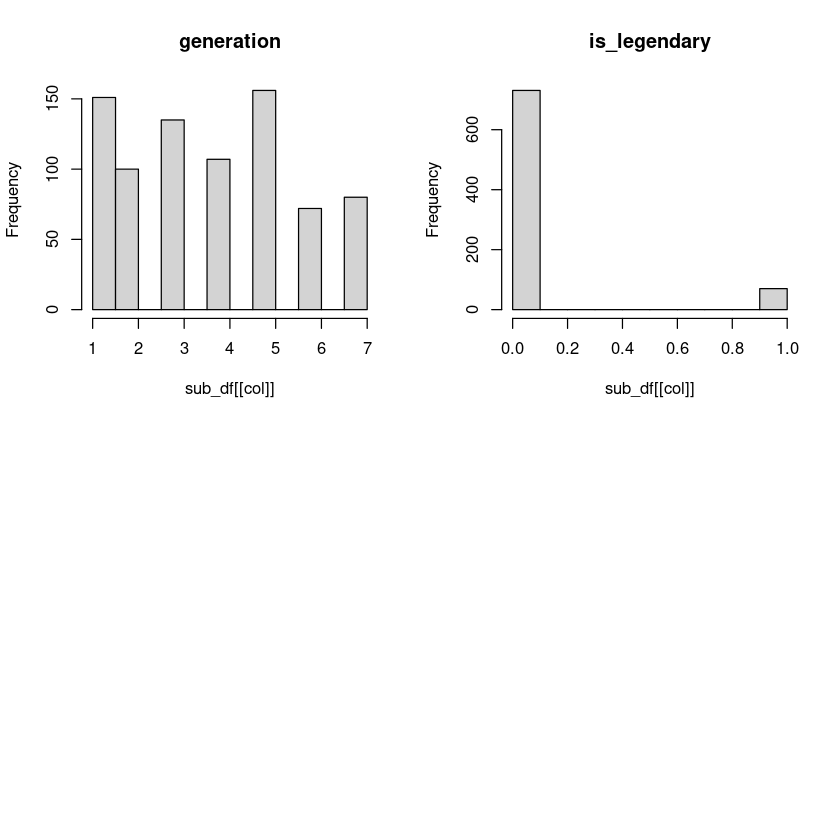

In [20]:
#Plot histograms for each attributes
par(mfrow=c(2, 2)) 
for (col in names(sub_df)) {
  if (is.numeric(sub_df[[col]])) {
    hist(sub_df[[col]], main=col)
  }
}


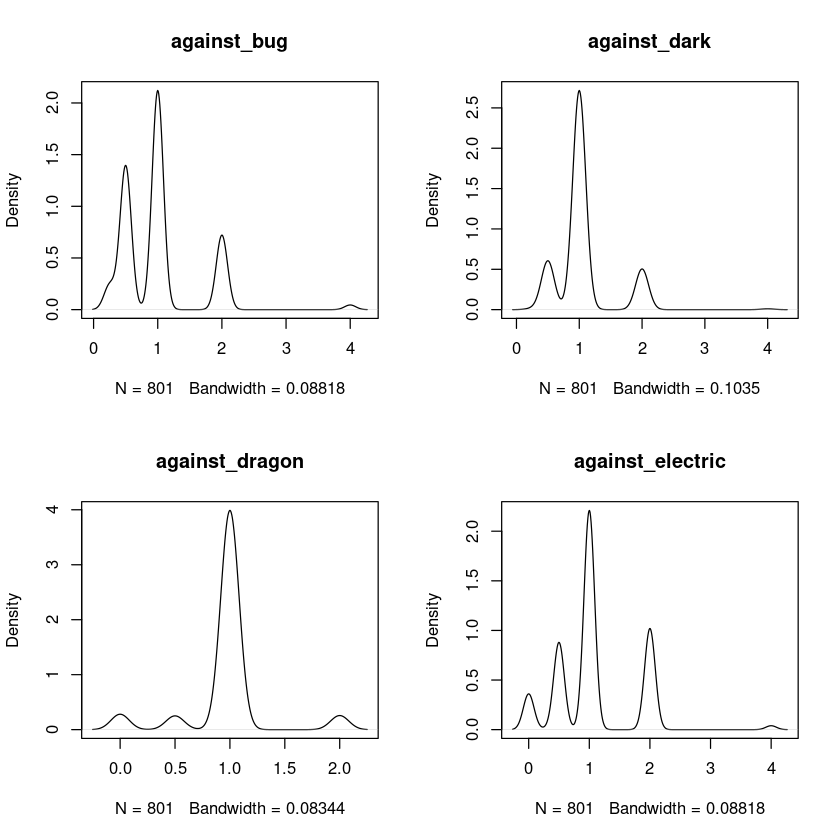

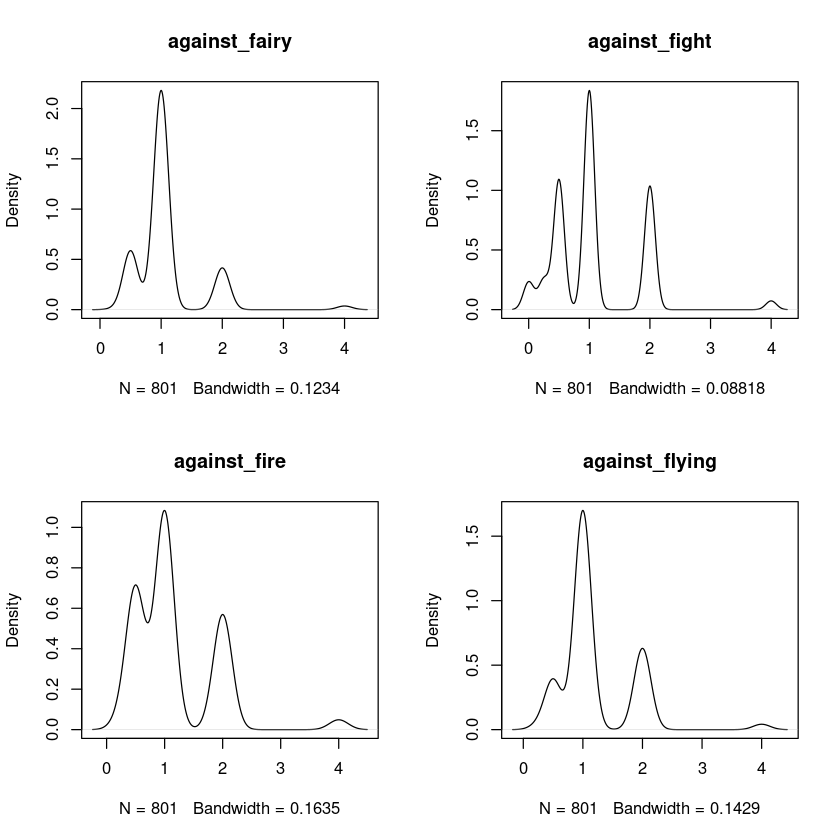

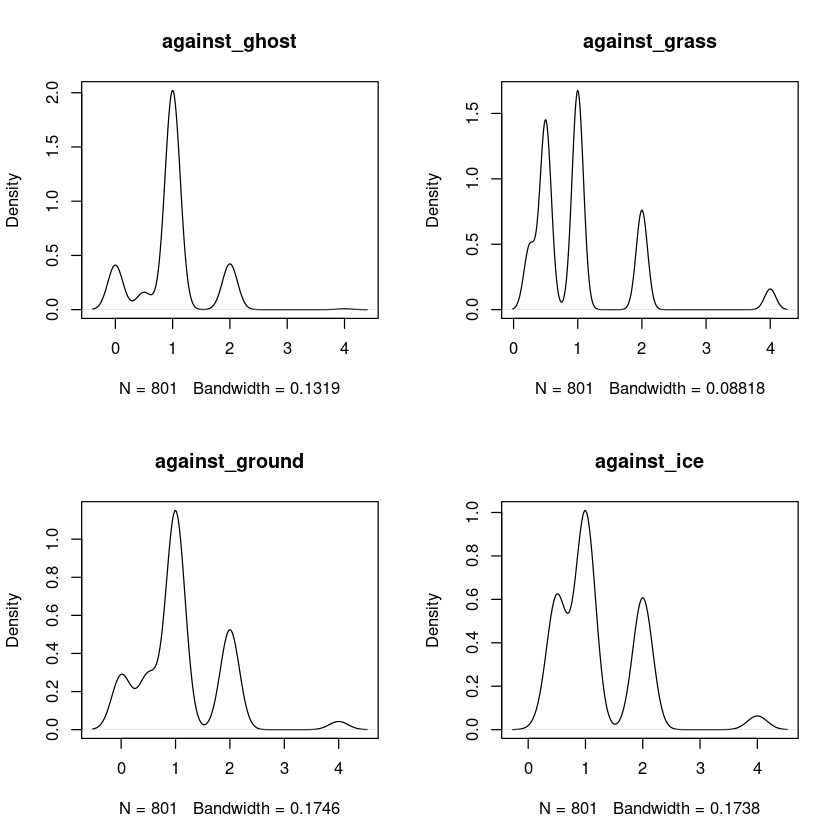

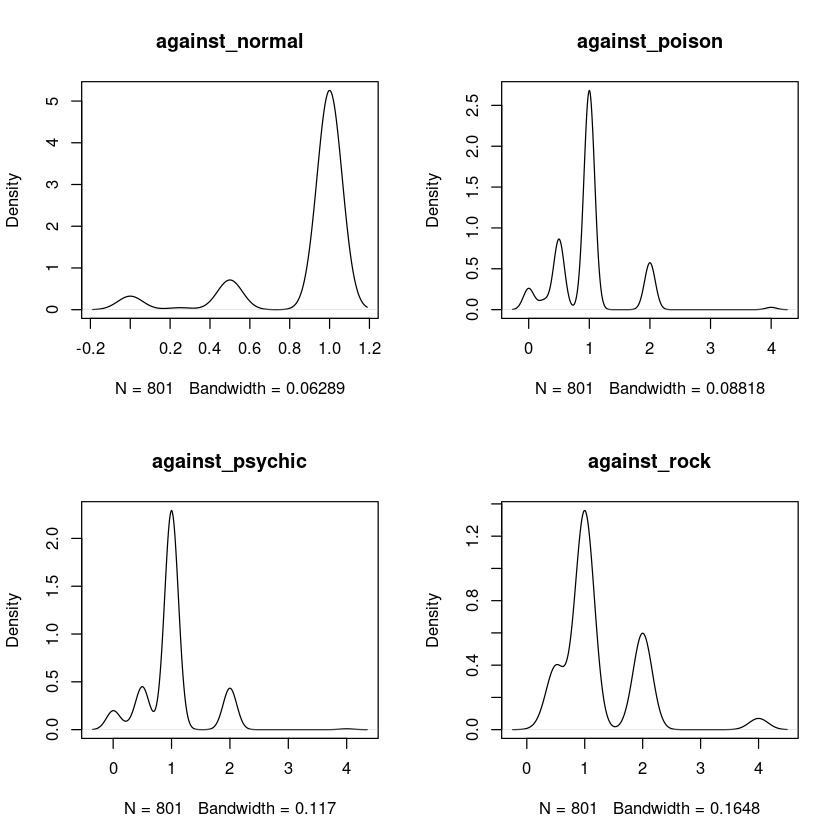

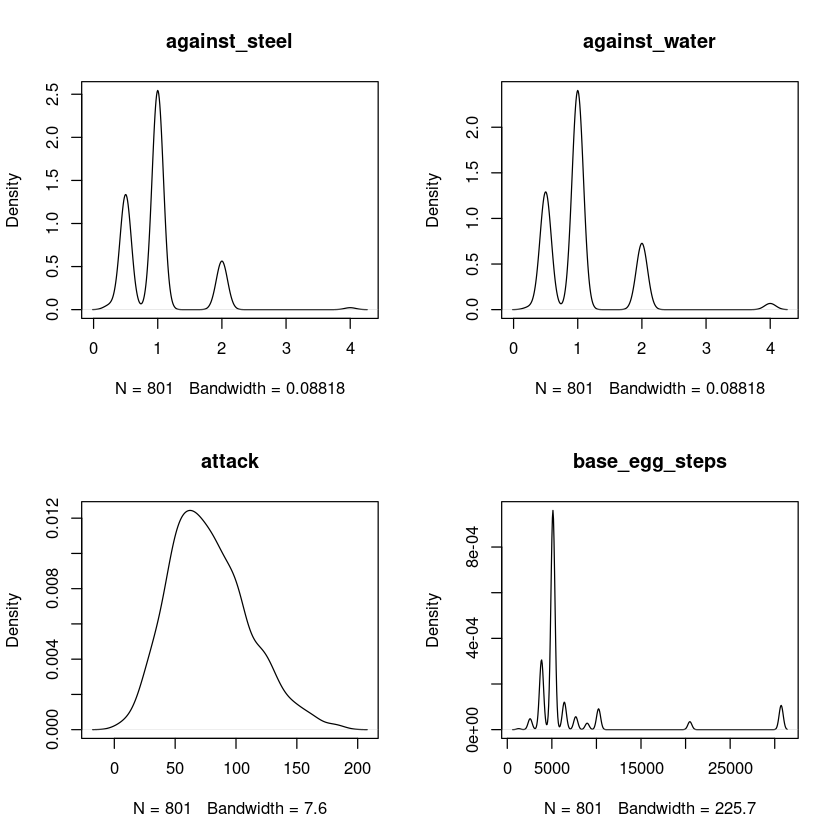

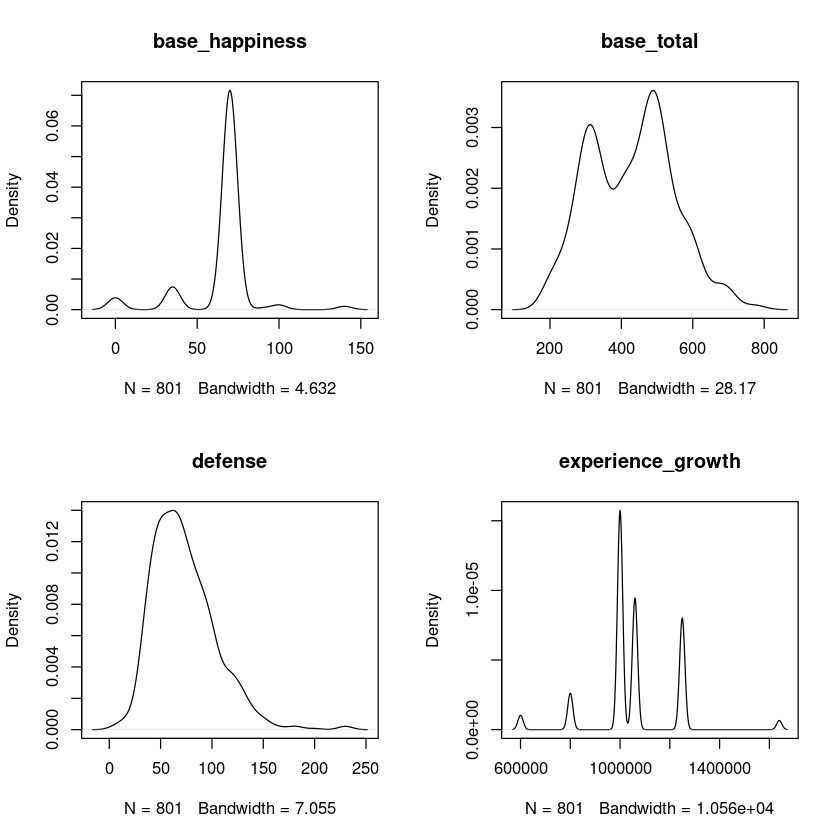

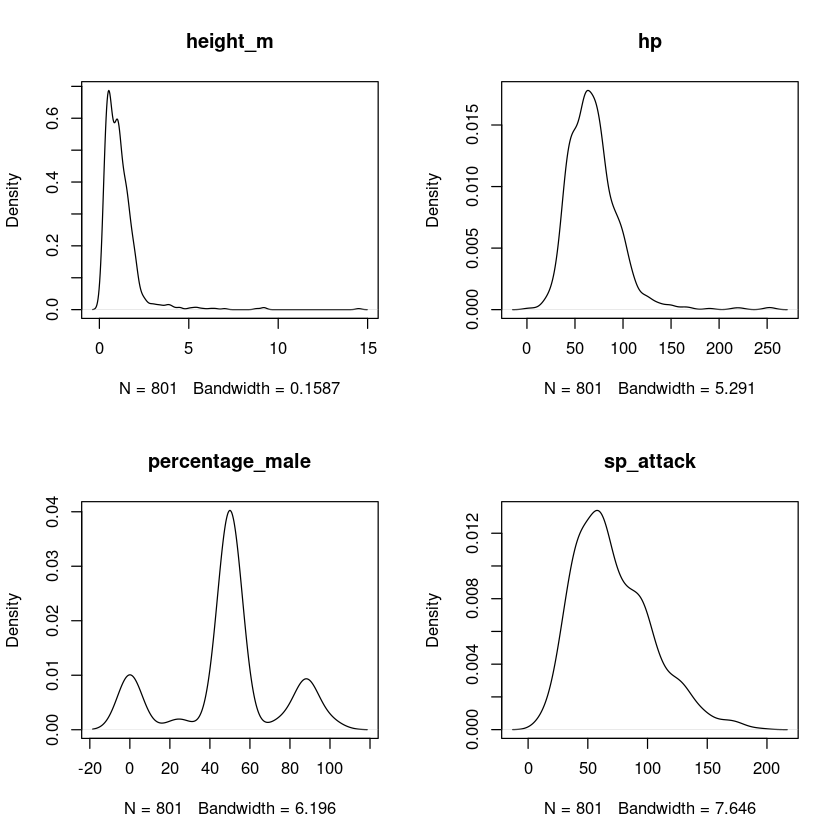

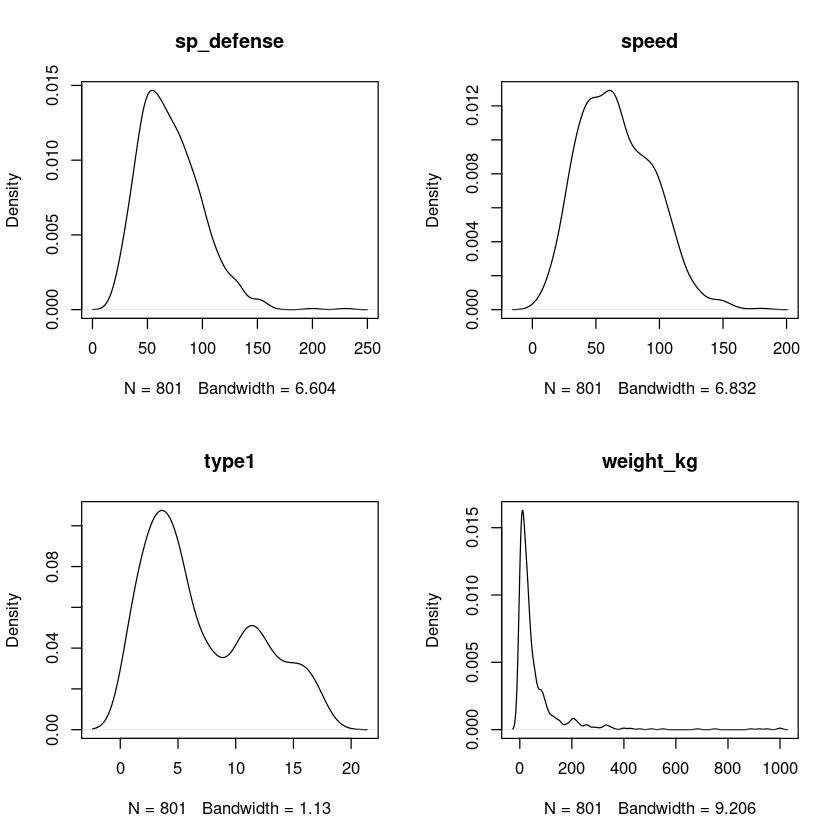

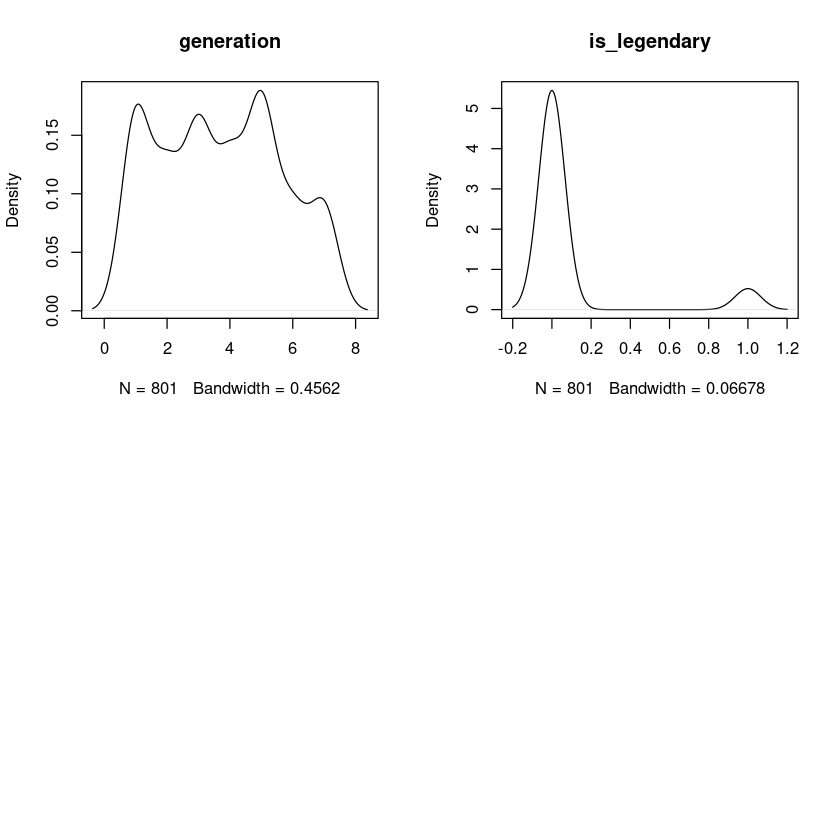

In [21]:
#Plot density plots for each attributes
par(mfrow=c(2, 2)) 
for (col in names(sub_df)) {
  if (is.numeric(sub_df[[col]])) {
    plot(density(sub_df[[col]]), main=col)
  }
}


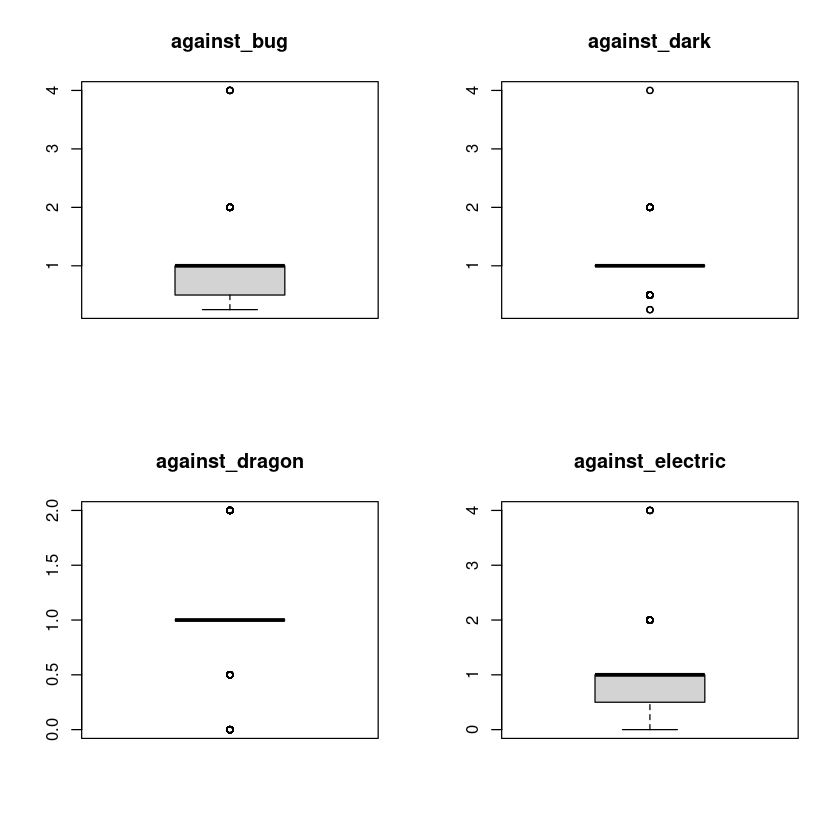

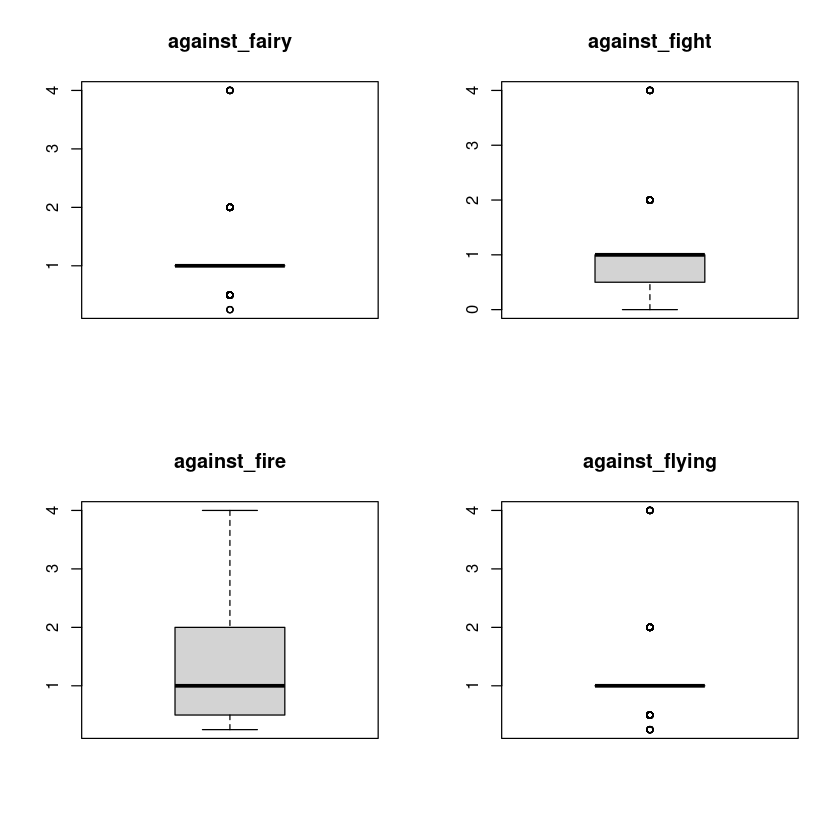

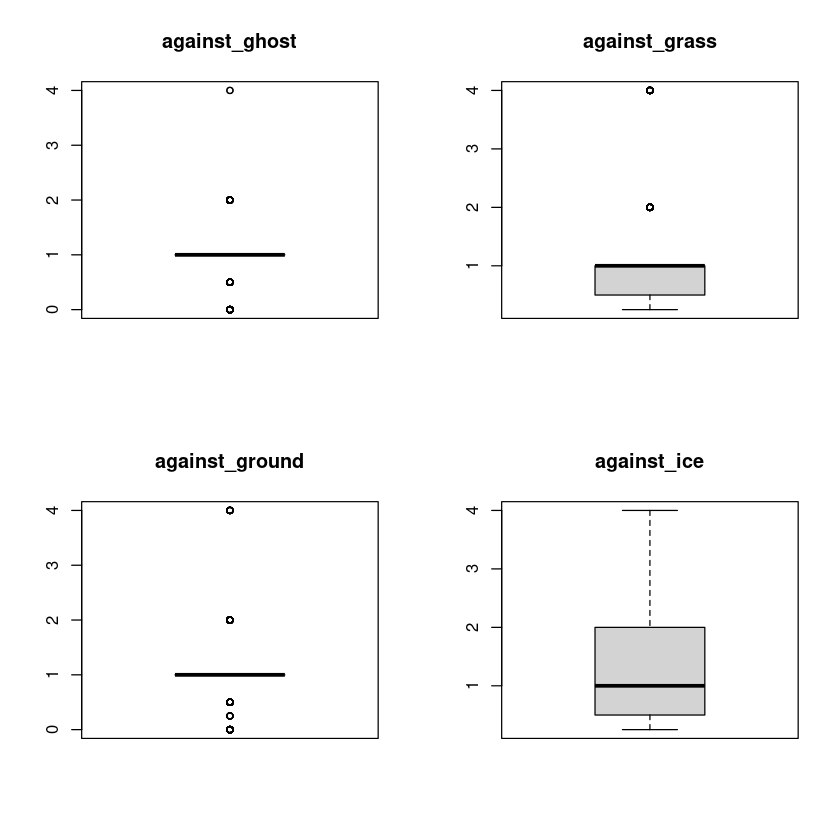

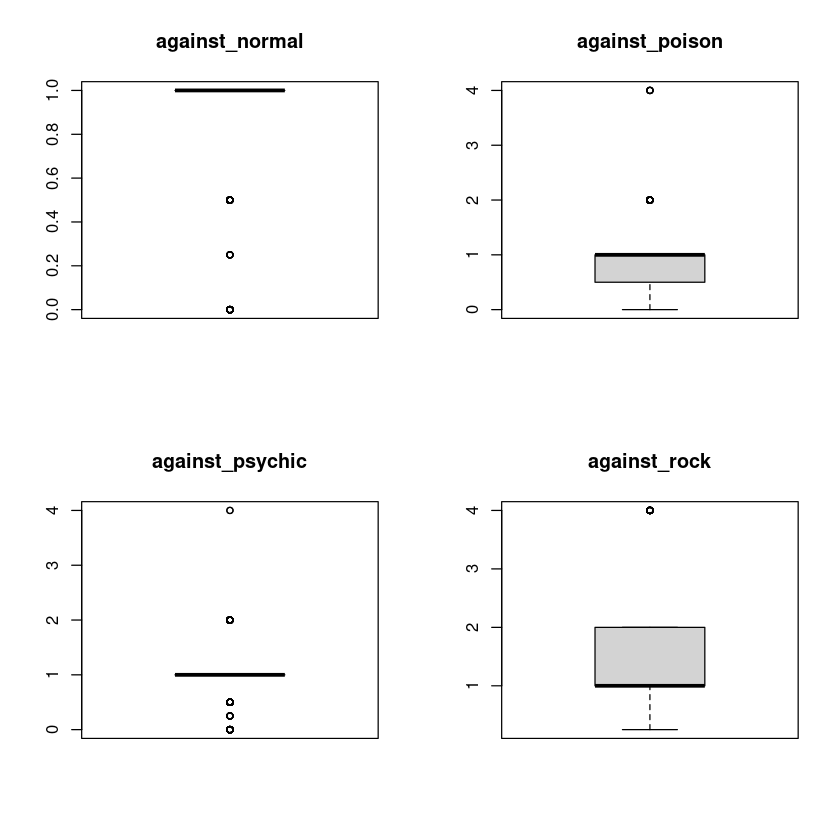

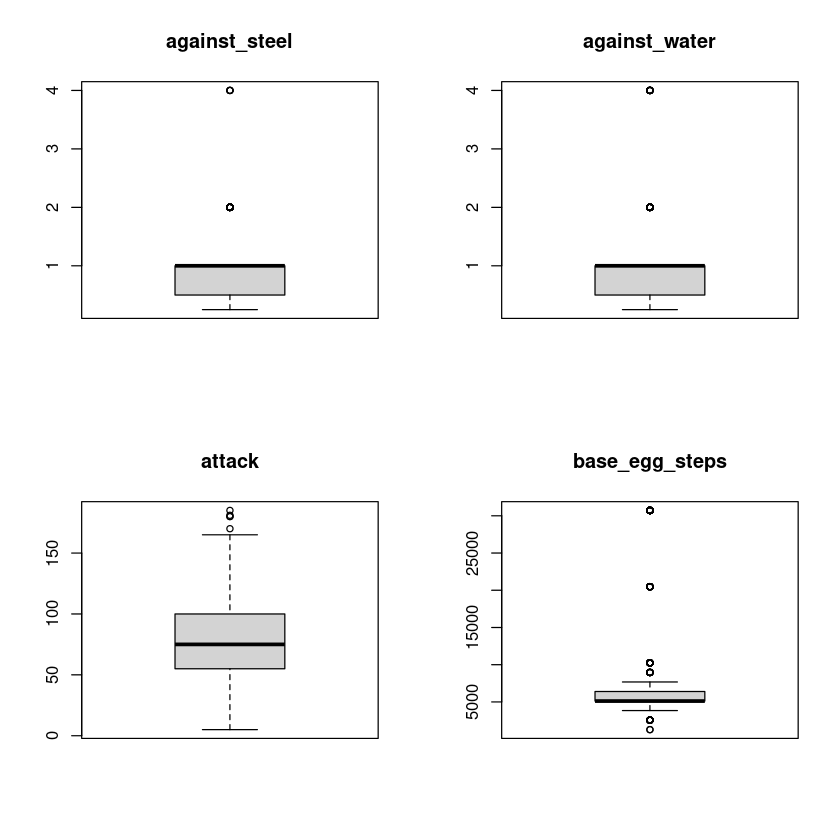

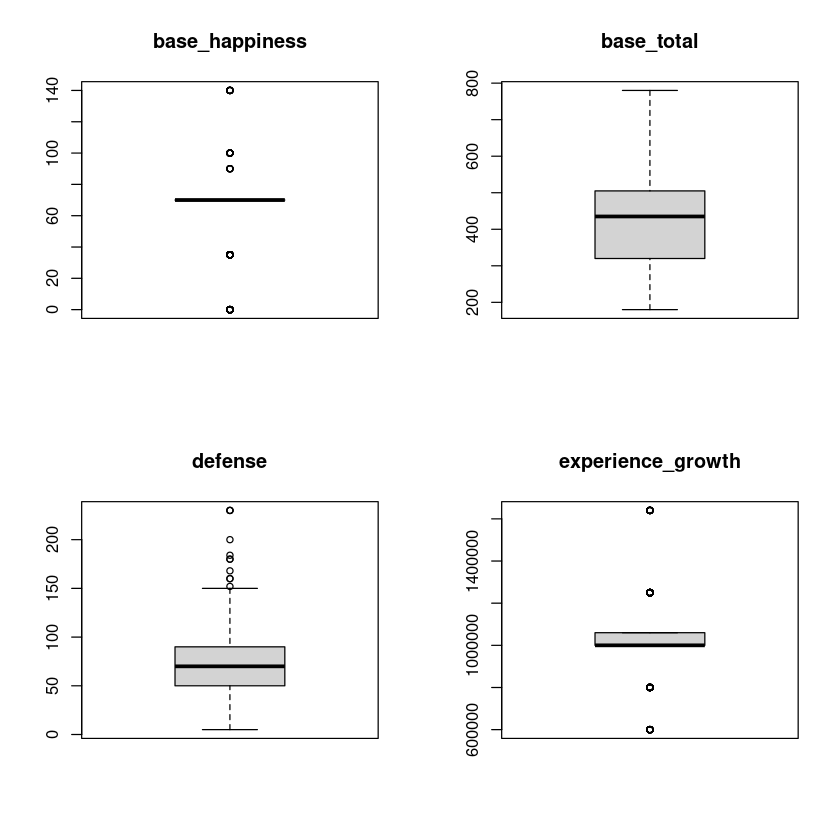

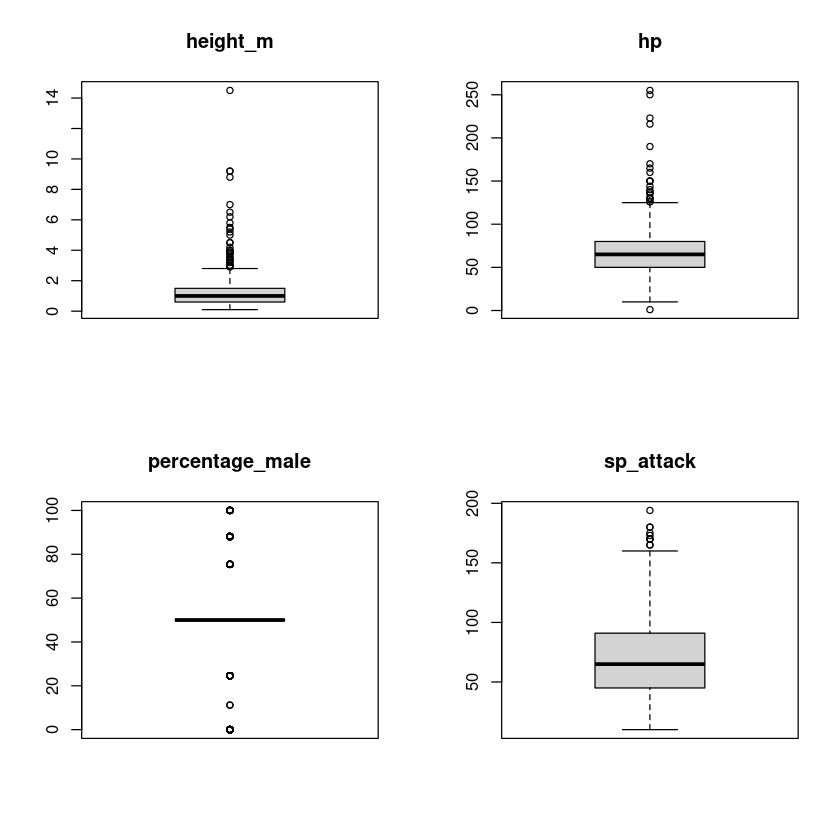

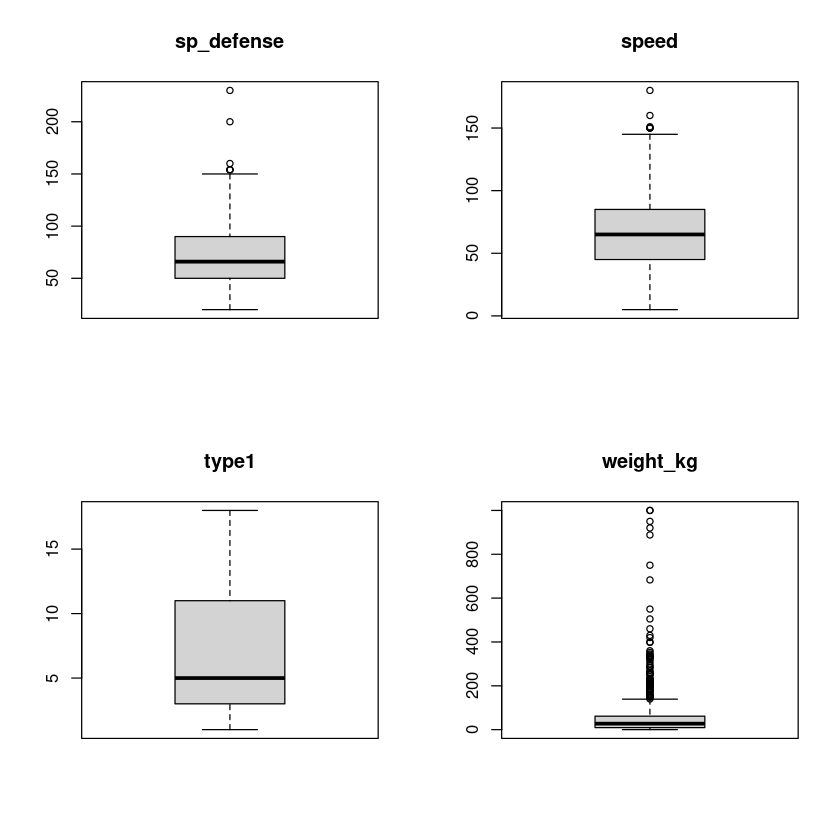

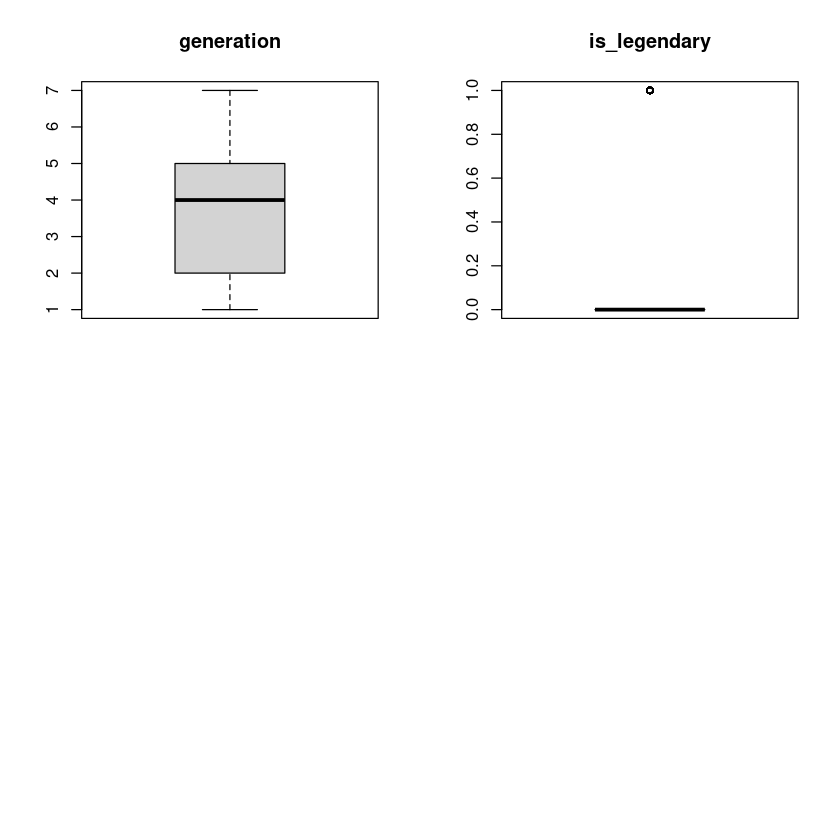

In [22]:
#Create boxplots for each attributes
par(mfrow=c(2, 2)) 
for (col in names(sub_df)) {
  if (is.numeric(sub_df[[col]])) {
    boxplot(sub_df[[col]], main=col)
  }
}


## Modelling

# CART Model

In [23]:
#Create train and test data
set.seed(100)

# Determine the number of rows for the training set (80%)
train_size <- round(0.8 * nrow(sub_df))

# Randomly shuffle the row indices
shuffled_indices <- sample(nrow(sub_df))

# Select 80% of the shuffled indices for the training set
train_indices <- shuffled_indices[1:train_size]

# Create the training set
train_data <- sub_df[train_indices, ]

# Create the testing set by excluding rows used for training
test_data <- sub_df[-train_indices, ]

In [24]:
#CART model implementation
cart_model <- rpart(type1 ~ ., data = train_data, method = "class")
cart_model

n= 641 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 641 547 3 (0.086 0.066 0.15 0.095 0.12 0.037 0.045 0.039 0.025 0.036 0.072 0.056 0.034 0.031 0.028 0.042 0.033 0.0047)  
     2) against_ghost< 0.25 82   3 5 (0 0.012 0 0 0.96 0 0.024 0 0 0 0 0 0 0 0 0 0 0) *
     3) against_ghost>=0.25 559 465 3 (0.098 0.073 0.17 0.11 0 0.043 0.048 0.045 0.029 0.041 0.082 0.064 0.039 0.036 0.032 0.048 0.038 0.0054)  
       6) against_grass>=1.5 135  53 3 (0 0 0.61 0 0 0 0 0.16 0 0 0 0.17 0.015 0.044 0 0 0 0)  
        12) against_water< 1.5 89   7 3 (0 0 0.92 0 0 0 0 0 0 0 0 0.045 0 0.034 0 0 0 0) *
        13) against_water>=1.5 46  24 8 (0 0 0 0 0 0 0 0.48 0 0 0 0.41 0.043 0.065 0 0 0 0)  
          26) against_steel< 1.5 21   2 8 (0 0 0 0 0 0 0 0.9 0 0 0 0 0.095 0 0 0 0 0) *
          27) against_steel>=1.5 25   6 12 (0 0 0 0 0 0 0 0.12 0 0 0 0.76 0 0.12 0 0 0 0) *
       7) against_grass< 1.5 424 363 4 (0.13 0.097 0.028 0.14 0 0.057 0.064 0.0071 0.038 0.054 0.

In [25]:
# Make predictions on the test set
predictions <- predict(cart_model, newdata = test_data, type = "class")

In [26]:
# Evaluate the model
conf_matrix <- table(predictions, test_data$type1)
print(conf_matrix)

           
predictions  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
         1  23  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
         2   0  7  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0
         3   0  1 18  1  0  0  0  0  0  0  0  2  0  0  0  0  0
         4   0  0  0  8  0  0  0  0  0  0  0  0  0  1  0  0  0
         5   0  1  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0
         6   0  0  2  0  0  5  0  0  0  0  0  0  0  0  2  0  0
         7   0  0  0  0  0  0  9  0  0  0  0  1  0  0  0  0  0
         8   0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0
         9   0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
         10  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0
         11  0  0  0  0  0  0  0  0  0  0  6  0  0  0  2  0  0
         12  0  0  0  0  0  0  0  3  0  0  0  6  0  0  0  0  0
         13  0  0  0  0  0  0  1  0  0  0  0  0  4  0  0  0  0
         14  0  0  0  1  0  0  0  0  0  0  0  0  0  2  0  1  0
         15  0  1  0  0  0  0  0  0  0  0  

In [27]:
# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy:", round(accuracy, 3)))

[1] "Accuracy: 0.831"


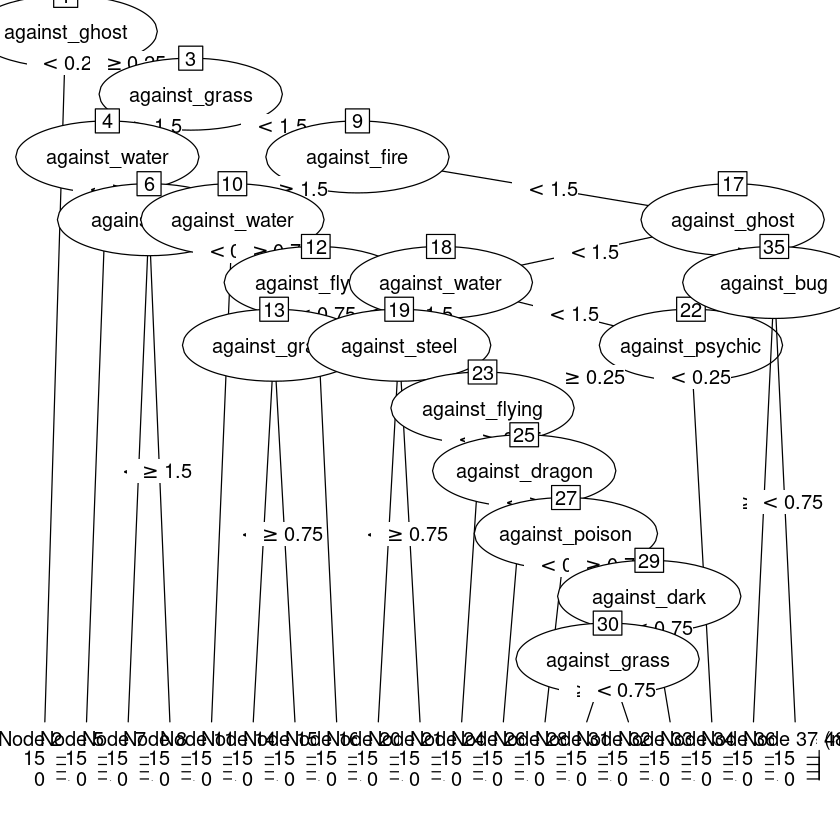

In [28]:
# Visualize the CART model
plot(as.party(cart_model))

In [29]:
printcp(cart_model)


Classification tree:
rpart(formula = type1 ~ ., data = train_data, method = "class")

Variables actually used in tree construction:
 [1] against_bug     against_dark    against_dragon  against_fire   
 [5] against_flying  against_ghost   against_grass   against_poison 
 [9] against_psychic against_steel   against_water  

Root node error: 547/641 = 0.85335

n= 641 

         CP nsplit rel error  xerror     xstd
1  0.144424      0   1.00000 1.00000 0.016373
2  0.089580      1   0.85558 0.85558 0.020546
3  0.079525      2   0.76600 0.78062 0.021828
4  0.073126      4   0.60695 0.65082 0.023000
5  0.042048      5   0.53382 0.53382 0.023051
6  0.040219      6   0.49177 0.49909 0.022887
7  0.034735      8   0.41133 0.44607 0.022474
8  0.031993      9   0.37660 0.40585 0.022023
9  0.029250     11   0.31261 0.37477 0.021588
10 0.027422     13   0.25411 0.30896 0.020394
11 0.023766     14   0.22669 0.27057 0.019505
12 0.018282     16   0.17916 0.24863 0.018923
13 0.016453     17   0.16088 0.2

In [30]:
cp = cart_model$cptable %>%
                      as.data.frame %>%
                      slice(which.min(xerror)) %>%
                      select(CP) %>%
                      as.numeric

In [31]:
pruned_prices = prune(cart_model, cp)

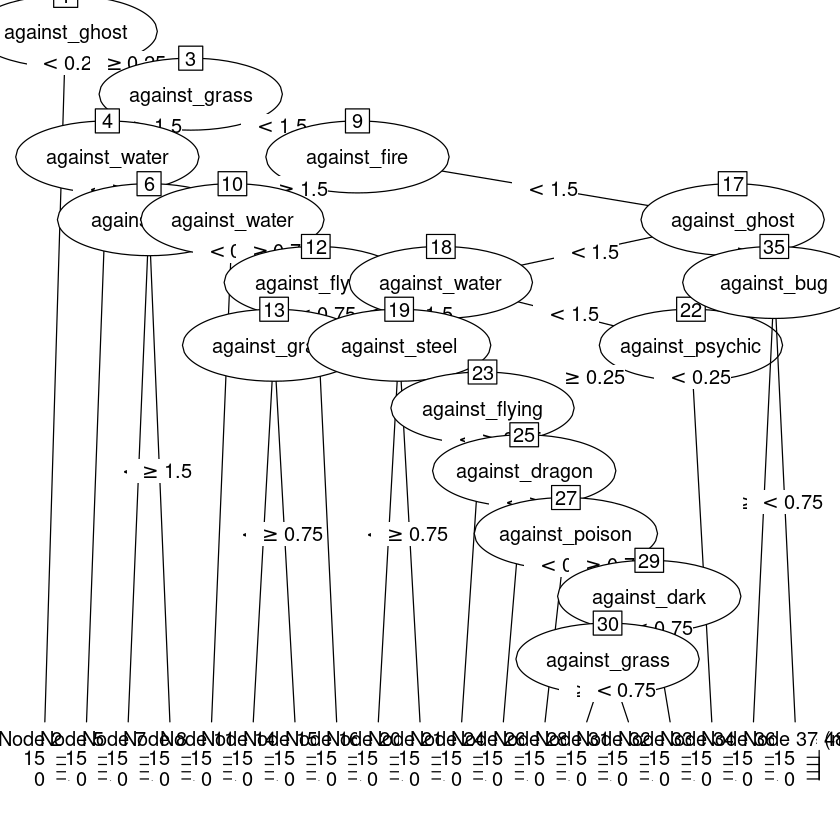

In [32]:
plot(as.party(pruned_prices))

In [33]:
# Make predictions on the test set
predictions_pruned <- predict(pruned_prices, newdata = test_data, type = "class")

In [34]:
# Evaluate the model
conf_matrix_pruned <- table(predictions_pruned, test_data$type1)
print(conf_matrix_pruned)

                  
predictions_pruned  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
                1  23  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
                2   0  7  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0
                3   0  1 18  1  0  0  0  0  0  0  0  2  0  0  0  0  0
                4   0  0  0  8  0  0  0  0  0  0  0  0  0  1  0  0  0
                5   0  1  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0
                6   0  0  2  0  0  5  0  0  0  0  0  0  0  0  2  0  0
                7   0  0  0  0  0  0  9  0  0  0  0  1  0  0  0  0  0
                8   0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0
                9   0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
                10  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0
                11  0  0  0  0  0  0  0  0  0  0  6  0  0  0  2  0  0
                12  0  0  0  0  0  0  0  3  0  0  0  6  0  0  0  0  0
                13  0  0  0  0  0  0  1  0  0  0  0  0  4  0  0  0  0
 

In [35]:
# Calculate accuracy
accuracy_pruned <- sum(diag(conf_matrix_pruned)) / sum(conf_matrix_pruned)
print(paste("Accuracy CART:", round(accuracy, 3)))

[1] "Accuracy CART: 0.831"


## Random Forest Model

In [36]:
#Create train and test data
set.seed(100)

# Determine the number of rows for the training set (80%)
train_size_rf <- round(0.8 * nrow(sub_df))

# Randomly shuffle the row indices
shuffled_indices_rf <- sample(nrow(sub_df))

# Select 80% of the shuffled indices for the training set
train_indices_rf <- shuffled_indices_rf[1:train_size_rf]

# Create the training set
train_data_rf <- sub_df[train_indices_rf, ]

# Create the testing set by excluding rows used for training
test_data_rf <- sub_df[-train_indices_rf, ]

In [37]:
#Trying with Random Forest 
rf_model <- randomForest(factor(type1) ~ ., data = train_data_rf)
rf_model
predictions <- predict(rf_model, newdata = test_data_rf)
predictions <- factor(predictions, levels = levels(factor(test_data_rf$type1)))
conf_matrix <- confusionMatrix(predictions, factor(test_data_rf$type1))
accuracy_rf <- sum(diag(conf_matrix$table)) / sum(conf_matrix$table)
print(paste("Accuracy Random Forest:", round(accuracy_rf, 3)))


Call:
 randomForest(formula = factor(type1) ~ ., data = train_data_rf) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 9.36%
Confusion matrix:
    1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 class.error
1  54  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0.01818182
2   0 39  0  0  0  0  0  0  0  0  1  1  0  0  0  1  0  0  0.07142857
3   0  0 87  1  0  1  0  0  0  0  0  3  0  1  0  0  1  0  0.07446809
4   0  1  2 56  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0.08196721
5   1  0  1  0 76  0  0  1  0  0  0  0  0  0  0  0  0  0  0.03797468
6   0  1  2  1  0 19  0  0  0  0  0  0  0  0  0  1  0  0  0.20833333
7   0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0.00000000
8   0  0  0  0  0  0  0 19  0  0  0  2  1  0  2  0  1  0  0.24000000
9   0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0.00000000
10  0  0  0  1  0  0  0  0  0 20  0  0  

[1] "Accuracy Random Forest: 0.931"


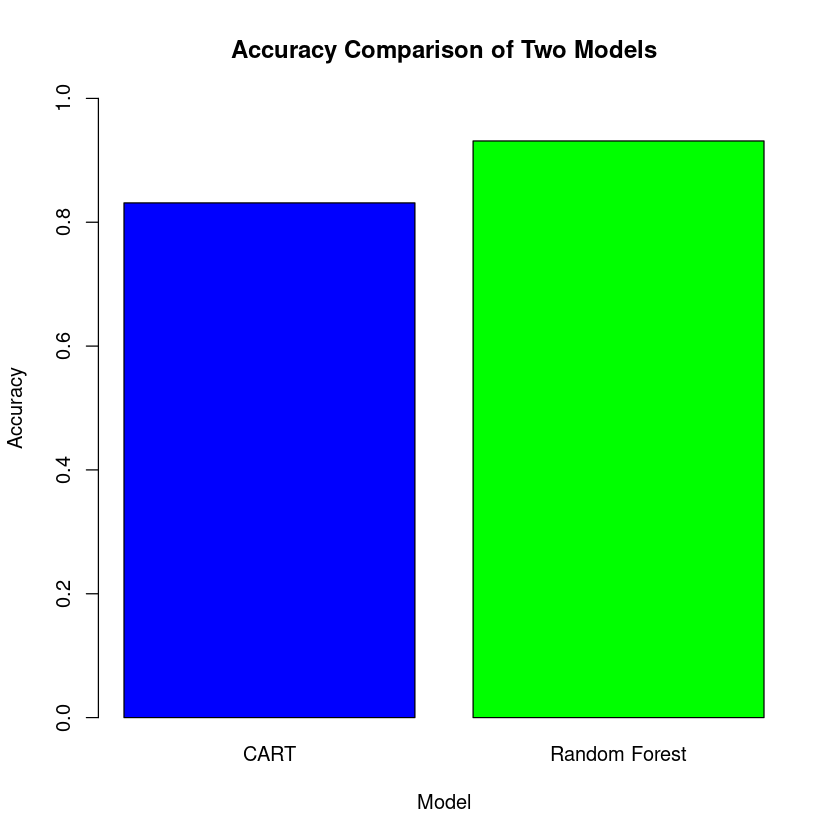

In [38]:
# Accuracy of model 1
accuracy_model1 <- accuracy  # Replace with the actual accuracy of model 1

# Accuracy of model 2
accuracy_model2 <- accuracy_rf  # Replace with the actual accuracy of model 2

# Models names
model_names <- c("CART", "Random Forest")

# Create a bar plot
barplot(c(accuracy_model1, accuracy_model2), 
        names.arg = model_names,
        ylim = c(0, 1),
        col = c("blue", "green"),
        xlab = "Model",
        ylab = "Accuracy",
        main = "Accuracy Comparison of Two Models")
